In [28]:
from lib import *
from features import *

# importing data

In [29]:
data = pd.read_csv('./train_data.csv')

In [30]:
data = data.sample(frac=0.4).reset_index(drop=True)
size = data.shape
size

(84484, 3)

# Data Visualisation
#showing data distribution over the four categories of headlines
m-Medical
e-Entertainment
b-Bussiness
t-Tech

(array([21674.,     0.,     0., 30328.,     0.,     0., 23391.,     0.,
            0.,  9091.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

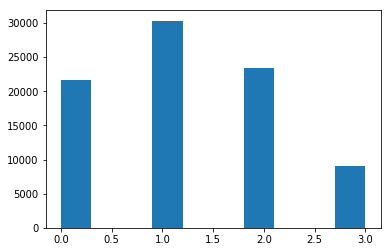

In [31]:
plt.hist(data.CATEGORY.factorize()[0])

# Data  samples

In [32]:
data.head()

,ID,TITLE,CATEGORY
0,103111,Sharing cyberthreat details not antitrust viol...,t
1,243248,Media Outlets Targeting Duck Dynasty's Phil Ro...,e
2,89198,Miley Cyrus cancels Charlotte show; Fans upset,e
3,418900,Spiders force automaker to recall midsize cars,t
4,342584,Pippa Middleton Talks About Her 'Unexpected' F...,e


In [33]:
for line,i in zip(data['TITLE'],range(data['TITLE'].shape[0])):
    data.loc[i,('TITLE')] = normalise_text(line)

In [34]:
data.head()

,ID,TITLE,CATEGORY
0,103111,sharing cyberthreat details antitrust violatio...,t
1,243248,media outlets targeting duck dynastys phil rob...,e
2,89198,miley cyrus cancels charlotte show fans upset,e
3,418900,spiders force automaker recall midsize cars,t
4,342584,pippa middleton talks unexpected fame first-ev...,e


In [35]:
cv_matrix, cv = countVectorizer(data)

In [36]:
tv_matrix, tv = tfidfTransformer(cv_matrix)

In [37]:
categories = data.CATEGORY.factorize()[0]

In [38]:

training_data, testing_data, training_op, test_op = split_data(tv_matrix,categories)

In [40]:
rfc_model = RandomForestClassifier(min_samples_split=4,criterion='entropy',random_state=10)

In [41]:
rfc_model.fit(training_data,training_op)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [42]:
rfc_model.score(training_data,training_op)

0.9906786808113986

In [43]:
rfc_model.score(testing_data,test_op)

0.8857193584659999

In [53]:
#url = "http://www.bbc.com/"
url = "https://in.yahoo.com/?p=us"
headlines = extract_hedlines(url)

In [54]:
for lines, i in zip(headlines, range(len(headlines))):
    headlines[i] = normalise_text(lines)

In [55]:
testing_headlines = pd.DataFrame({"TITLE":headlines})

In [56]:
testing_cv_matrix = cv.transform(testing_headlines['TITLE'])

In [57]:
testing_cv_matrix = testing_cv_matrix.toarray()


In [58]:
transformed_testing_data = tv.transform(testing_cv_matrix) 

In [59]:
prediction = rfc_model.predict(transformed_testing_data)

In [60]:
for i in range(testing_headlines['TITLE'].shape[0]):
    if(len(testing_headlines.TITLE[i])>20):
        print(testing_headlines.TITLE[i]," ",data.CATEGORY.factorize()[1][prediction[i]])

opposition parties like dmk ncp rjd , jd ( ) , extended support bandh .   t
weekly horoscope 10th sep 16th sep 2018 ) analysis provide insights crucial planetary movements impact life . stay tuned astroyogi ’ expert astrologers horoscope analysis . single , marriage proposals expected chances falling love first sight . take care health avoid smoking drinking alcohol .   m
heartbreaking news chelsi smith first texan win miss universe crown , passed away year-long battle liver cancer age 45. former beauty queen bollywood actor sushmita sen ,   e
sanghavis car blue-coloured maruti ignis , found police near sector 11 airoli , navi mumbai , thursday . police officer said blood stains knife found rear seat car .   b
shahid kapoor mira rajput became parents second time baby boy .   e
paro derogatory term used women trafficked sold brides men haryana   e
apache rtr 160 4v carburettor model got covered comes racing heritage tvs motor read detailed review new tvs apache rtr 160 4v   e
aishwarya 